In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import glob
import os

In [2]:
import re

In [3]:
files = glob.glob('DATA/publications/*.csv')

In [4]:
df = pd.concat([pd.read_csv(path, index_col=0) for path in files], ignore_index=True).drop_duplicates(subset='DOI')

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib qt

counts = pd.value_counts(df.Source)

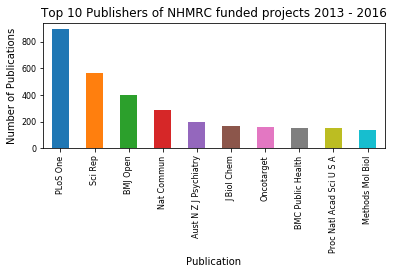

In [6]:
N = 10
kwds = dict(title=f'Top {N} Publishers of NHMRC funded projects 2013 - 2016',
            rot = 90, fontsize=8, stacked=True)

counts.head(N).plot('bar', **kwds)
plt.subplots_adjust(top=0.85, bottom=0.415, left=0.11, right=0.9, hspace=0.2, wspace=0.2)
plt.xlabel('Publication');plt.ylabel('Number of Publications');

In [7]:
df

,DOI,FullJournalName,PMID,PubDate,Source,sid
0,10.3233/JAD-171145,NaN,29562546,2018,J Alzheimers Dis,15665
1,10.3233/JAD-161259,NaN,28655134,2017,J Alzheimers Dis,15665
2,10.3233/JAD-161158,NaN,28387666,2017,J Alzheimers Dis,15665
3,10.3233/JAD-151084,NaN,27031482,2016 Mar 31,J Alzheimers Dis,15665
4,10.1016/j.jsbmb.2018.10.006,NaN,30321667,2018 Oct 12,J Steroid Biochem Mol Biol,15889
5,10.3390/nu10091258,NaN,30205427,2018 Sep 7,Nutrients,15889
6,10.1016/j.jsbmb.2018.09.005,NaN,30201225,2018 Sep 7,J Steroid Biochem Mol Biol,15889
7,10.3233/JAD-180263,NaN,30149446,2018,J Alzheimers Dis,15889
8,10.1007/s00726-018-2623-6,NaN,30136029,2018 Aug 22,Amino Acids,15889
9,10.1002/erv.2622,NaN,30003634,2018 Sep,Eur Eat Disord Rev,15889


In [8]:
df.to_csv('DATA/all_pubs.csv')

In [25]:
def doiorg_doi(doi, proxy=True):
    from urllib.parse import quote as q
    if proxy: 
        netloc = 'doi-org.ezp.lib.unimelb.edu.au'
    else: 
        netloc = 'doi.org'
    return f'https://{netloc}/{q(doi)}'
    
def scholar_doi(doi):
    from urllib.parse import quote as q
    
    base = 'https://scholar-google-com.ezp.lib.unimelb.edu.au/scholar'
    query = q(doi)
    return f'{base}?oi=gsb95&q={query}&lookup=0&hl=en'

In [58]:
import webbrowser
for doi in df.sample(n=20, random_state=1).DOI:
    webbrowser.open(doiorg_doi(doi), new=1)
   